Customer Churn Prediction 
---
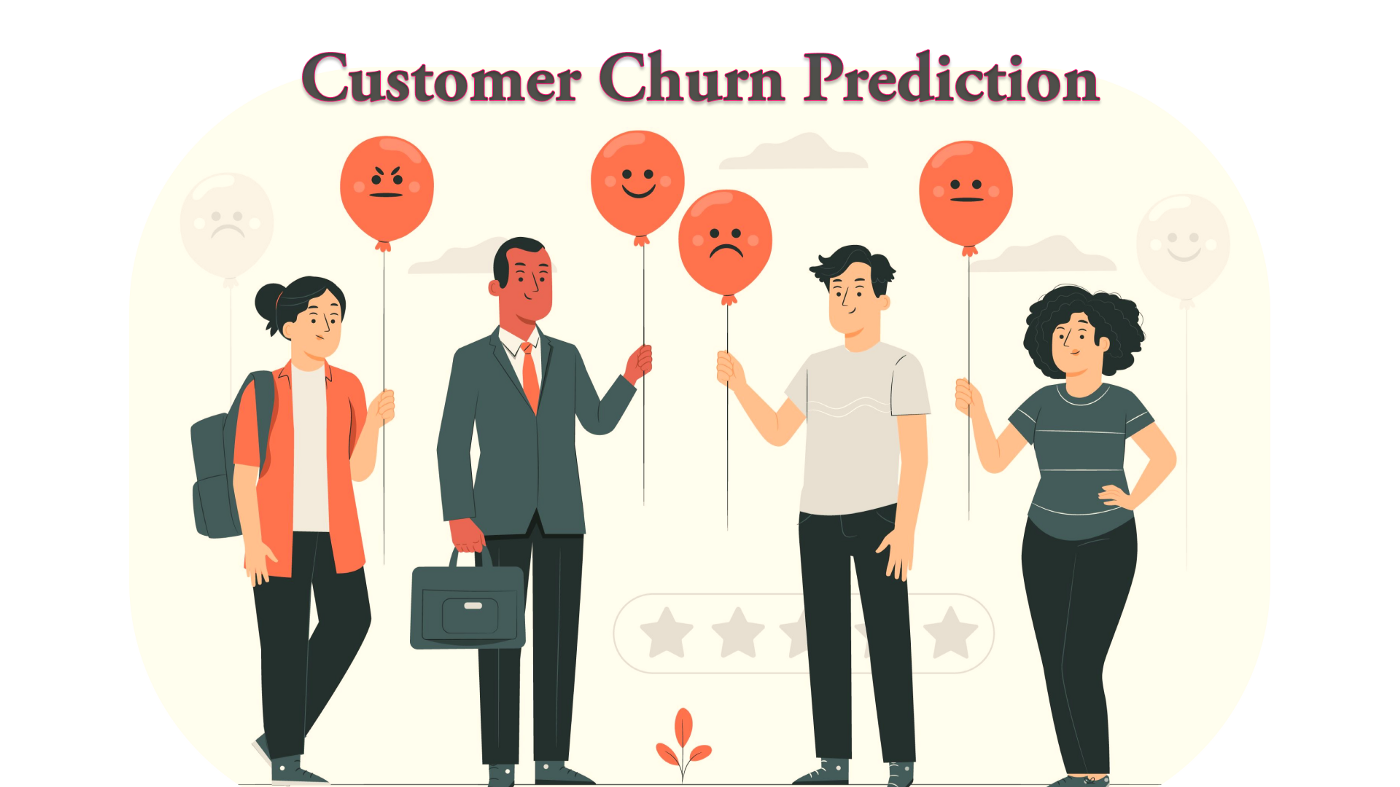

BY: PRECIOUS EBITE AZUN

Importing libraries needed
---

In [994]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 12)
from sklearn.model_selection import train_test_split

Let's see our data

In [995]:
telecom=pd.read_csv('telecom_churn.csv')
telecom.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [996]:
telecom.shape

(3333, 11)

In [997]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [998]:
telecom.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [999]:
telecom.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [1000]:
telecom.duplicated().sum()

0

Judging by the data present, it is not possible to have exact call time or ranges for customers because they could take calls at any length(Mins,Days) as they want. Data and other information are also at their discretion.
So knowing this, we can decide to ignore the outliers.
I wouldn't tell you how much calls you should make in a day right? Exactly!!

Exploratory Data Analysis
---

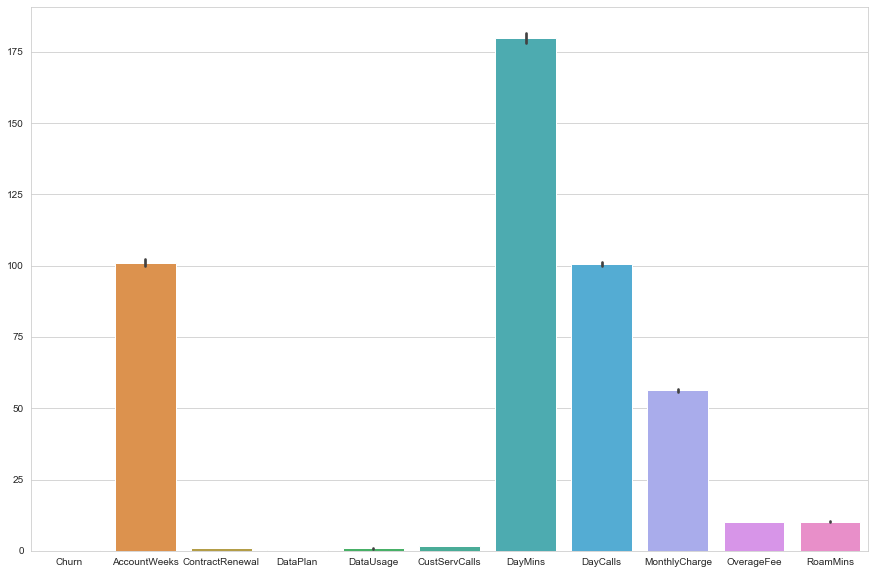

In [1001]:
plt.figure(figsize=(15,10))
sns.barplot(data=telecom)
plt.show()

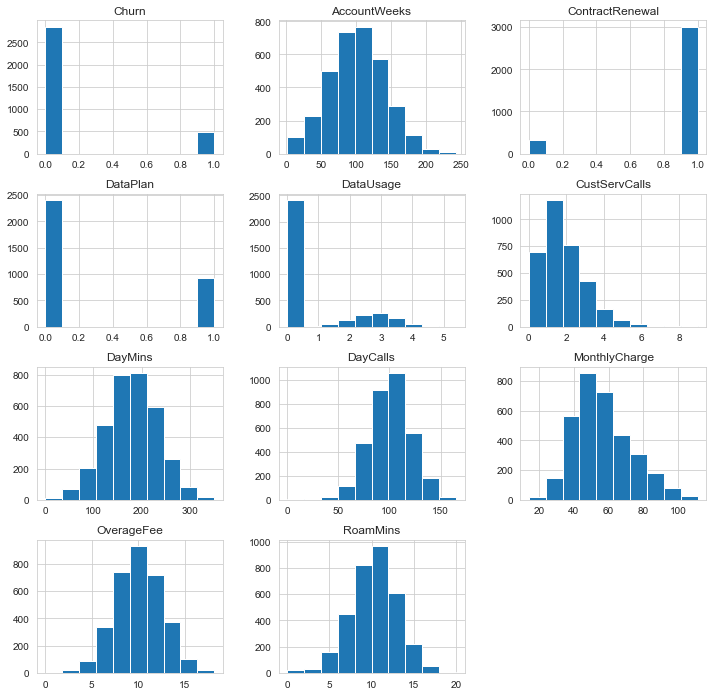

In [1002]:
telecom.hist()
plt.show()

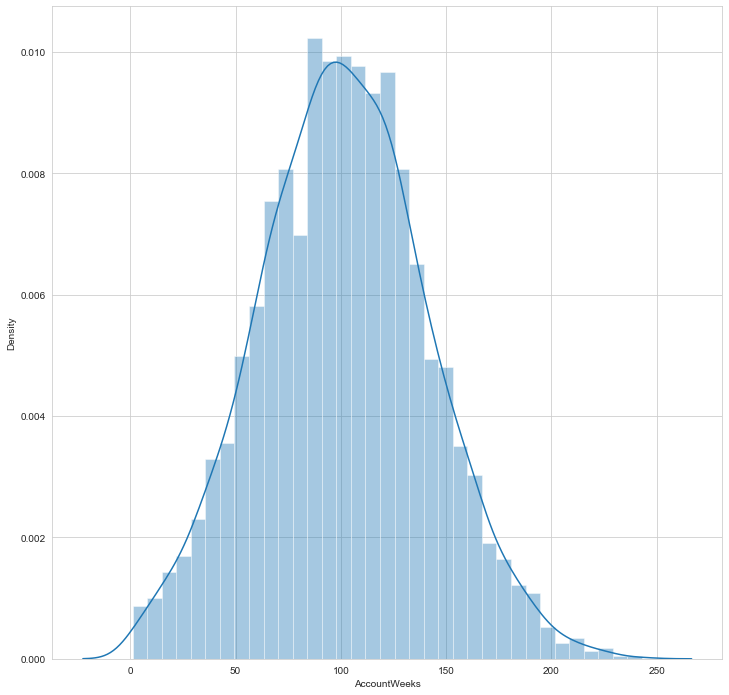

In [1003]:
sns.distplot(telecom['AccountWeeks'])
plt.show()

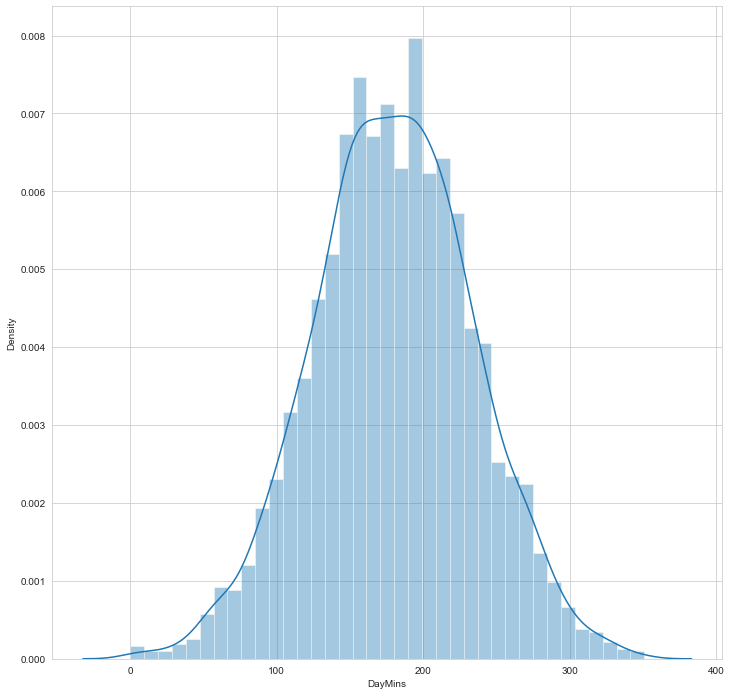

In [1004]:
sns.distplot(telecom['DayMins'])
plt.show()

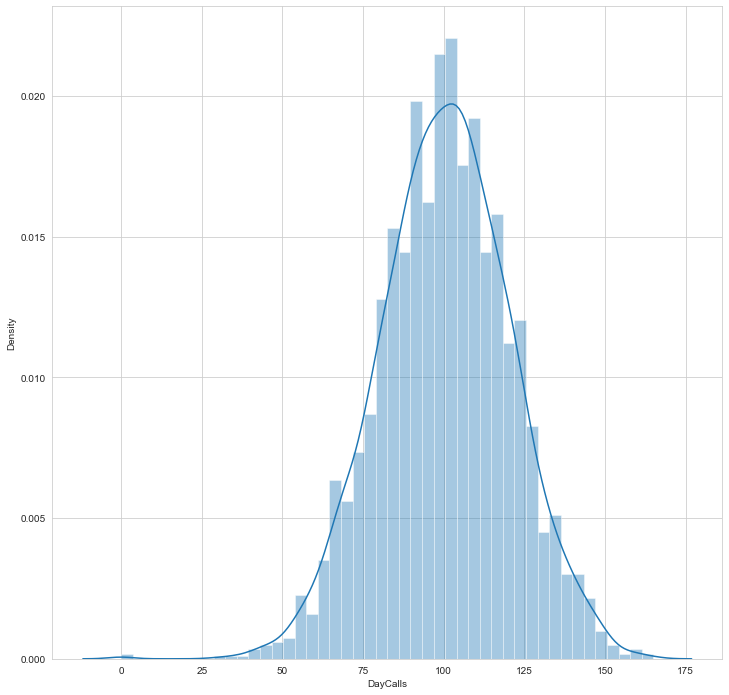

In [1005]:
sns.distplot(telecom['DayCalls'])
plt.show()

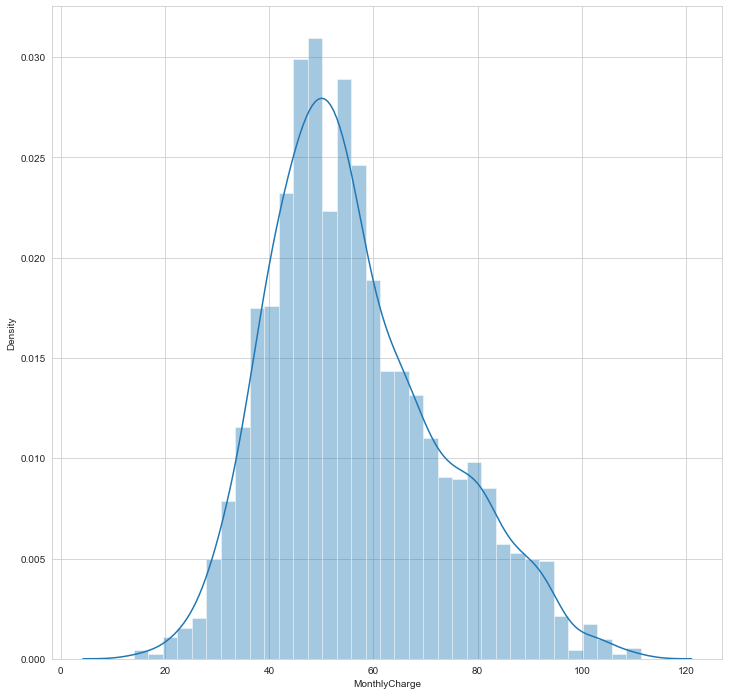

In [1006]:
sns.distplot(telecom['MonthlyCharge'])
plt.show()

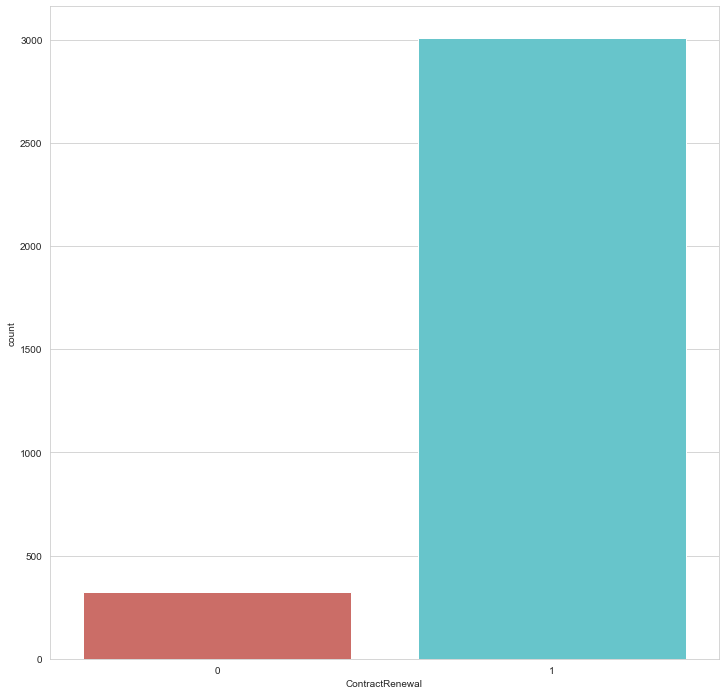

In [1007]:
sns.countplot('ContractRenewal', data=telecom, palette='hls')
plt.show()

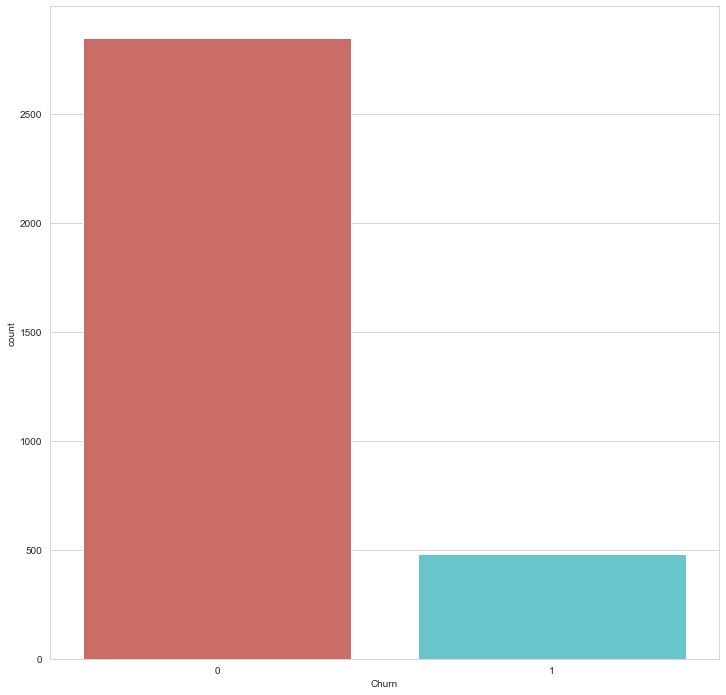

In [1008]:
sns.countplot('Churn', data=telecom, palette='hls')
plt.show()

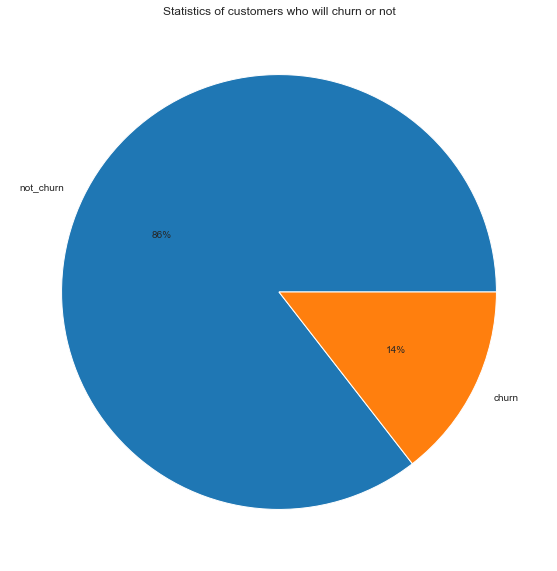

In [1009]:
plt.figure(figsize=(15,10))
plt.pie(telecom['Churn'].value_counts(), labels=['not_churn','churn'], autopct='%0.0f%%')
plt.title('Statistics of customers who will churn or not')
plt.show()

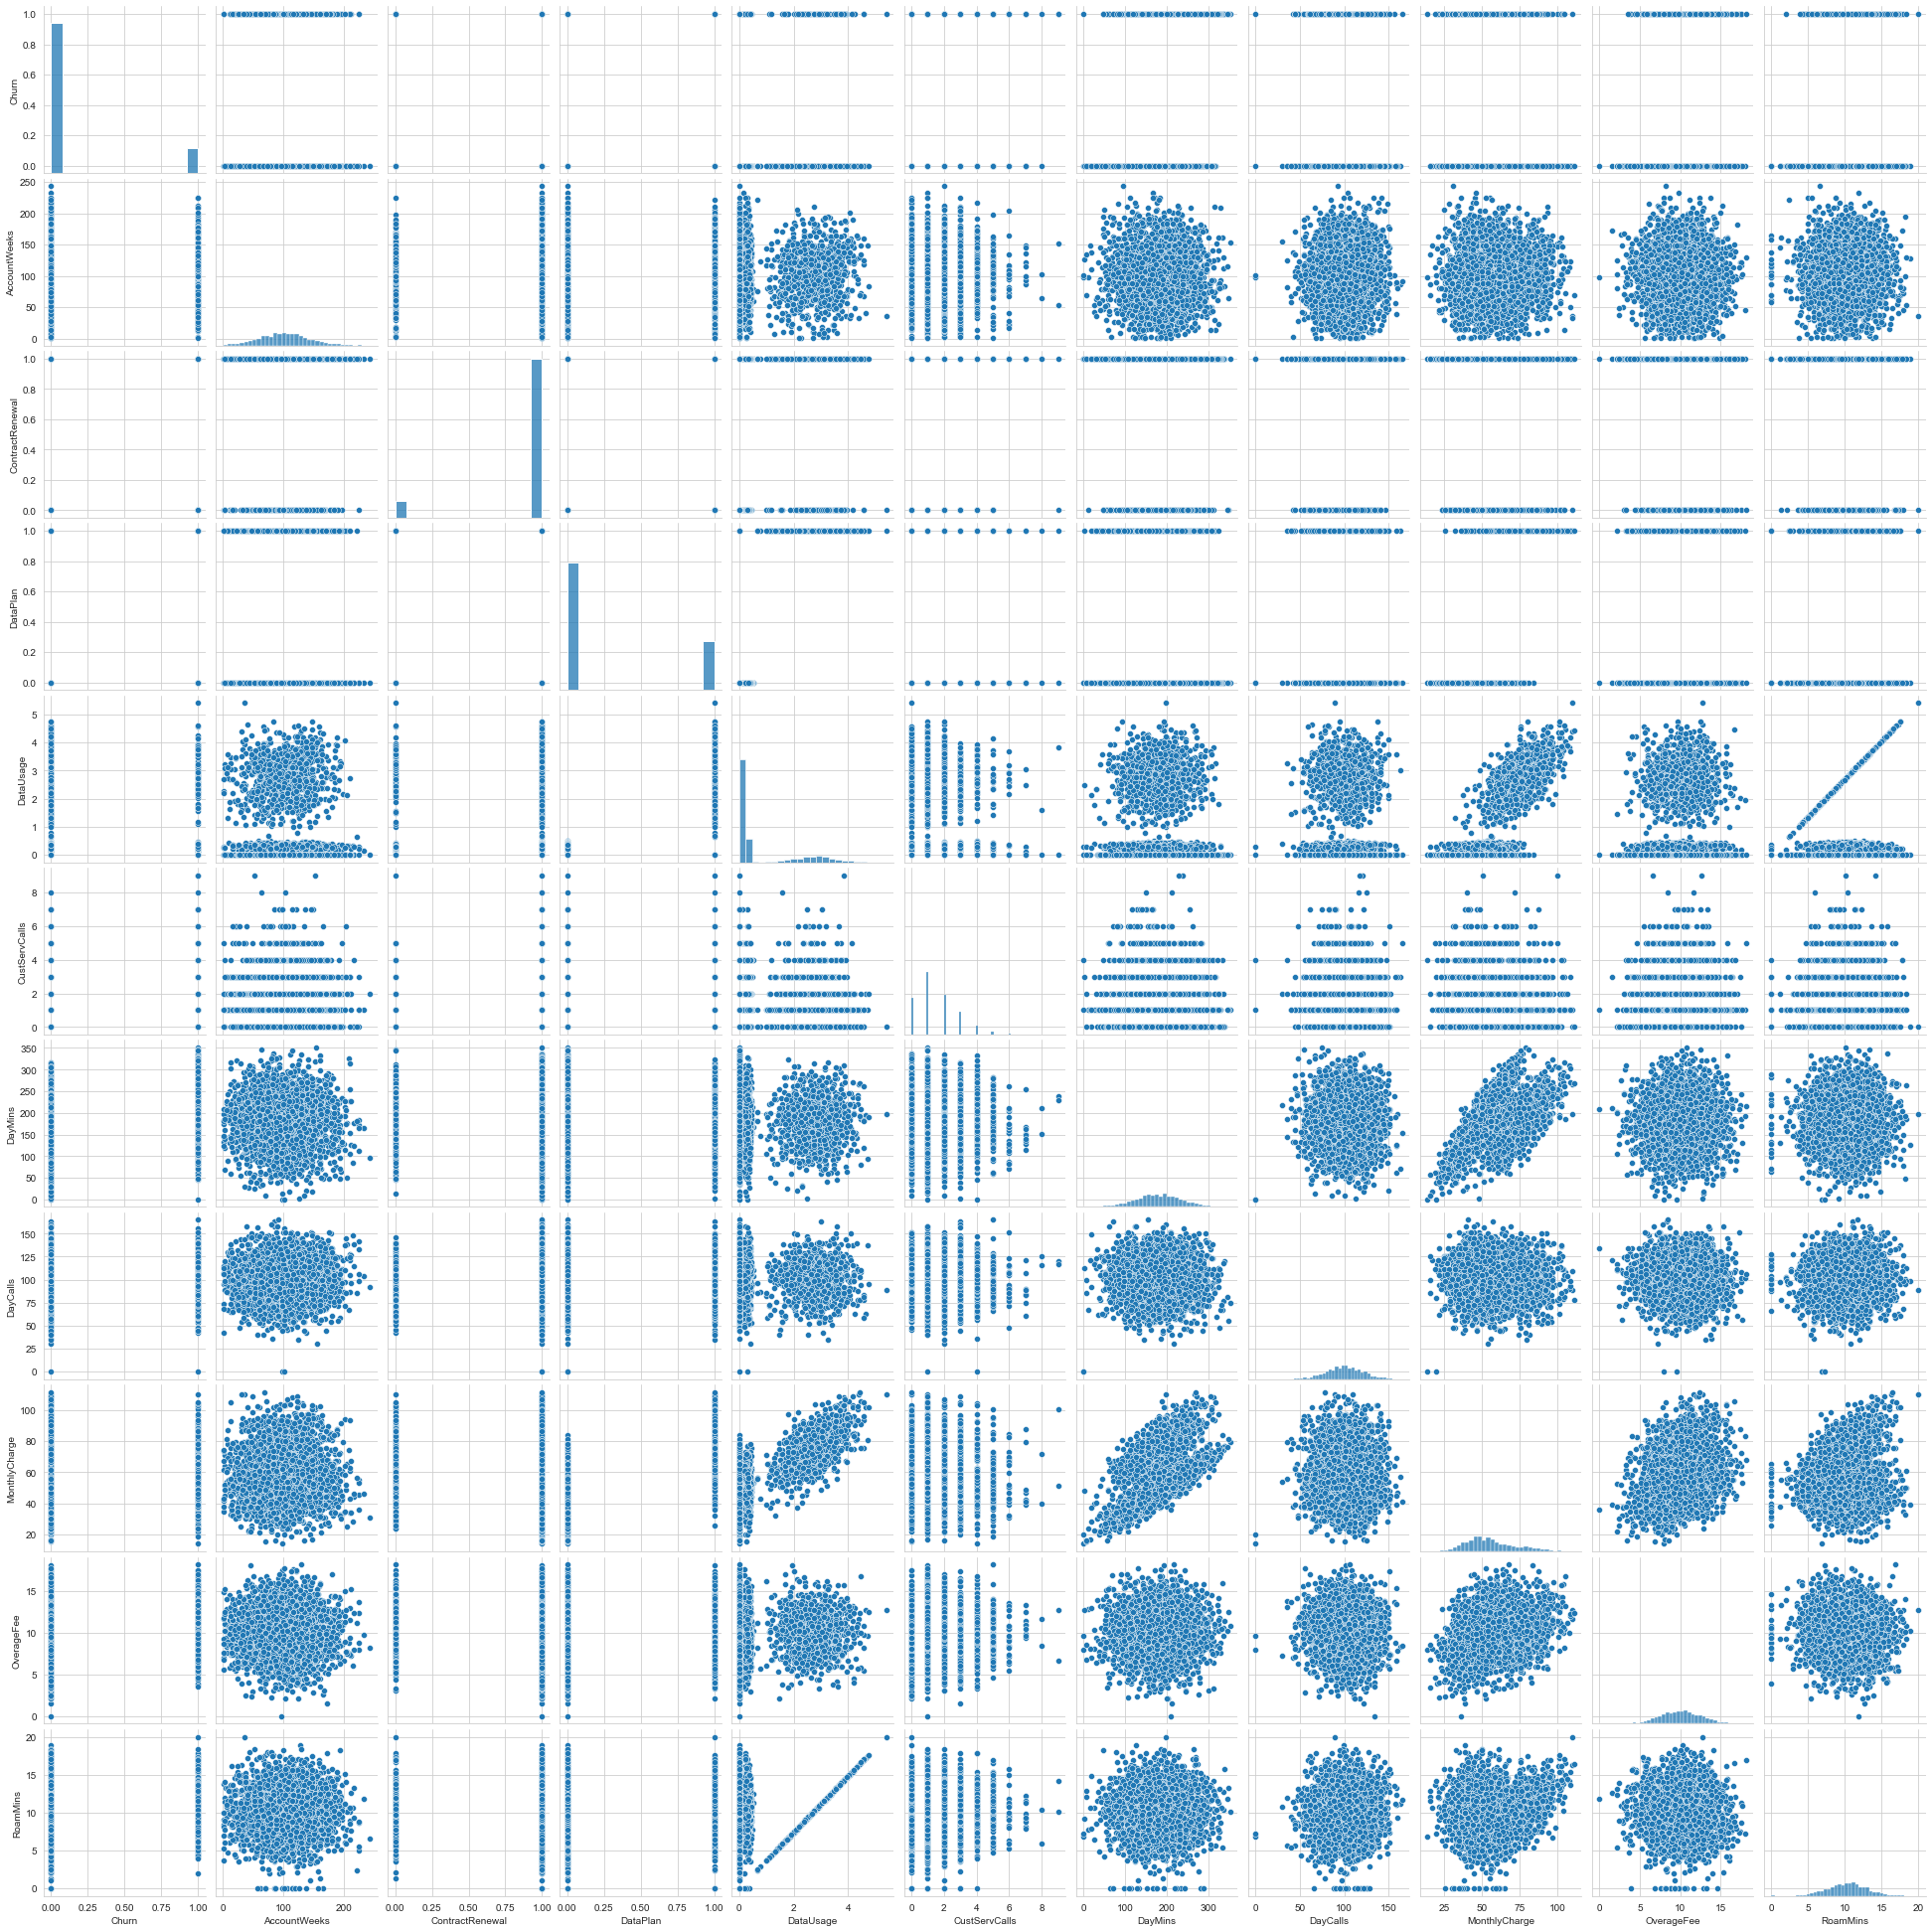

In [1010]:
sns.pairplot(data=telecom)
plt.show()

Partitioning
---
It is very important to complete this process of splitting your training and test sets before normalizing to avoid data leakage.

In [1011]:
telecom.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [1012]:
X=telecom.drop('Churn', axis=1)
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [1013]:
Y=telecom['Churn']
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [1014]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.34,random_state=42, shuffle=True)

In [1015]:
X_train.shape,Y_train.shape

((2199, 10), (2199,))

In [1016]:
X_test.shape,Y_test.shape

((1134, 10), (1134,))

In [1017]:
X_train

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2658,101,1,0,0.00,0,257.3,84,60.0,9.24,13.5
2018,153,1,1,2.03,1,167.7,104,70.3,12.34,7.5
1814,72,1,0,0.00,0,198.4,147,53.0,10.85,13.1
1653,93,0,0,0.00,1,131.4,78,42.0,10.99,11.1
3131,107,1,0,0.21,5,189.7,76,48.1,7.81,8.3
...,...,...,...,...,...,...,...,...,...,...
1095,106,1,0,0.00,1,274.4,120,64.0,9.93,6.0
1130,122,1,0,0.00,1,35.1,62,22.0,9.04,12.7
1294,66,1,0,0.24,1,87.6,76,40.4,13.10,9.2
860,169,1,0,0.00,2,179.2,111,46.0,8.76,9.9


In [1018]:
Y_train

2658    0
2018    0
1814    0
1653    1
3131    0
       ..
1095    0
1130    0
1294    0
860     0
3174    0
Name: Churn, Length: 2199, dtype: int64

In [1019]:
X_test

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
438,113,1,0,0.00,1,155.0,93,55.0,16.53,13.5
2674,67,1,0,0.00,0,109.1,117,38.0,10.87,12.8
1345,98,1,0,0.00,4,0.0,0,14.0,7.98,6.8
1957,147,1,0,0.33,1,212.8,79,57.3,10.21,10.2
2148,96,1,0,0.30,1,144.0,102,47.0,11.24,10.0
...,...,...,...,...,...,...,...,...,...,...
1424,78,1,0,0.34,0,140.7,77,44.4,9.76,11.7
1677,123,1,0,0.00,1,163.1,119,49.0,12.47,9.0
2441,111,1,1,3.27,1,193.1,104,75.7,5.58,12.1
2784,119,1,0,0.21,3,239.1,88,64.1,12.18,10.9


In [1020]:
Y_test

438     0
2674    0
1345    1
1957    0
2148    0
       ..
1424    0
1677    0
2441    0
2784    1
2092    0
Name: Churn, Length: 1134, dtype: int64

Normalization
---

In [1021]:
telecom.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [1022]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.fit_transform(X_test)

In [1023]:
X_train_std

array([[ 0.01453935,  0.32149925, -0.61116001, ...,  0.23386469,
        -0.32430081,  1.17934558],
       [ 1.31747493,  0.32149925,  1.63623272, ...,  0.86695801,
         0.90017299, -0.97569924],
       [-0.7120978 ,  0.32149925, -0.61116001, ..., -0.1963929 ,
         0.31163558,  1.03567593],
       ...,
       [-0.86243652,  0.32149925, -0.61116001, ..., -0.97085656,
         1.20036656, -0.36510321],
       [ 1.71837819,  0.32149925, -0.61116001, ..., -0.62665049,
        -0.51389676, -0.11368131],
       [-1.61413013,  0.32149925,  1.63623272, ..., -0.98314964,
        -1.42237732, -0.58060769]])

In [1024]:
X_test_std

array([[ 0.26977989,  0.33918173, -0.63245553, ..., -0.09083394,
         2.55561068,  1.1488058 ],
       [-0.89172539,  0.33918173, -0.63245553, ..., -1.10779001,
         0.32924262,  0.8992513 ],
       [-0.10897184,  0.33918173, -0.63245553, ..., -2.54349269,
        -0.80754248, -1.23978724],
       ...,
       [ 0.21927966,  0.33918173,  1.58113883, ...,  1.14745963,
        -1.75158547,  0.6496968 ],
       [ 0.42128057,  0.33918173, -0.63245553, ...,  0.45353666,
         0.84453276,  0.2218891 ],
       [-0.86647528,  0.33918173, -0.63245553, ..., -0.38993866,
        -1.16942562,  0.18623845]])

Implementing Algorithms
---

Logistic Regression
---

In [1025]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [1026]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [1027]:
Y_pred=lr.predict(X_test)

In [1028]:
from sklearn.metrics import accuracy_score
lr_acc=accuracy_score(Y_test,Y_pred)

In [1029]:
lr_acc*100

14.726631393298058

In [1030]:
lr_train_accuracy=lr.score(X_train_std,Y_train)

In [1031]:
lr_train_accuracy*100

85.99363346975898

In [1032]:
lr_test_accuracy=lr.score(X_test,Y_test)

In [1033]:
lr_test_accuracy*100

14.726631393298058

Decision Tree
---


In [1034]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [1035]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [1036]:
Y_pred=dt.predict(X_test)

In [1037]:
from sklearn.metrics import accuracy_score
dt_acc=accuracy_score(Y_test,Y_pred)
dt_acc*100

84.83245149911816

In [1038]:
dt_train_accuracy=dt.score(X_train_std,Y_train)
dt_train_accuracy*100

100.0

In [1039]:
dt_test_accuracy=dt.score(X_test,Y_test)

In [1040]:
dt_test_accuracy*100

84.83245149911816

Random Forest
---

In [1041]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [1042]:
Y_pred=rf.predict(X_test)

In [1043]:
from sklearn.metrics import accuracy_score
rf_acc=accuracy_score(Y_test,Y_pred)
rf_acc*100

39.85890652557319

In [1044]:
rf_train_accuracy=rf.score(X_train_std,Y_train)
rf_train_accuracy*100

100.0

In [1045]:
rf_test_accuracy=rf.score(X_test,Y_test)
rf_test_accuracy*100

39.85890652557319

KNN
---

In [1046]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [1047]:
Y_pred=knn.predict(X_test)

In [1048]:
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(Y_test,Y_pred)
knn_acc*100

46.38447971781305

In [1049]:
knn_train_accuracy=knn.score(X_train_std,Y_train)
knn_train_accuracy*100

93.13324238290132

In [1050]:
knn_test_accuracy=knn.score(X_test,Y_test)
knn_test_accuracy*100

46.38447971781305

Bagging Classifier
---

In [1051]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(X_train_std,Y_train)

BaggingClassifier()

In [1052]:
Y_pred=bc.predict(X_test)

In [1053]:
from sklearn.metrics import accuracy_score
bc_acc=accuracy_score(Y_test,Y_pred)
bc_acc*100

33.06878306878307

In [1054]:
bc_train_accuracy=bc.score(X_train_std,Y_train)
bc_train_accuracy*100

98.90859481582538

In [1055]:
bc_test_accuracy=bc.score(X_test,Y_test)
bc_test_accuracy*100

33.06878306878307

SVM
---

In [1056]:
from sklearn.svm import SVC
sv=SVC()

In [1057]:
sv.fit(X_train_std,Y_train)

SVC()

In [1058]:
Y_pred=sv.predict(X_test)
from sklearn.metrics import accuracy_score
svc_acc=accuracy_score(Y_test,Y_pred)
svc_acc*100

85.27336860670194

In [1059]:
svc_train_accuracy = sv.score(X_train_std,Y_train)
svc_train_accuracy*100

93.1787175989086

In [1060]:
svc_test_accuracy=sv.score(X_test,Y_test)
svc_test_accuracy*100

85.27336860670194

In [1061]:
data= {'Classifier':['Logistic Regression','Decision Tree', 'Random Forest', 'KNN', 'Bagging', 'SVM'],
       'Training_accuracy %':[lr_train_accuracy*100,dt_train_accuracy*100,rf_train_accuracy*100,knn_train_accuracy*100,bc_train_accuracy*100,svc_train_accuracy*100],
       'Testing_accuracy %':[lr_test_accuracy*100,dt_test_accuracy*100,rf_test_accuracy*100,knn_test_accuracy*100,
                        bc_test_accuracy*100,svc_test_accuracy*100],
       'Overall_model_accuracy %':[lr_acc*100,dt_acc*100,rf_acc*100,knn_acc*100,bc_acc*100,svc_acc*100]}
df=pd.DataFrame(data)
df

,Classifier,Training_accuracy %,Testing_accuracy %,Overall_model_accuracy %
0,Logistic Regression,85.993633,14.726631,14.726631
1,Decision Tree,100.000000,84.832451,84.832451
2,Random Forest,100.000000,39.858907,39.858907
3,KNN,93.133242,46.384480,46.384480
4,Bagging,98.908595,33.068783,33.068783
5,SVM,93.178718,85.273369,85.273369


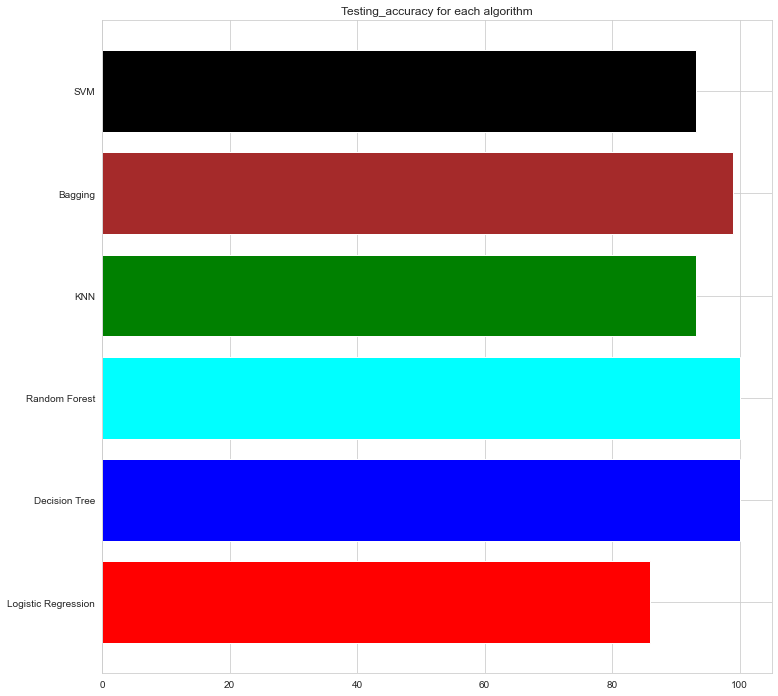

In [1062]:
plt.barh(['Logistic Regression','Decision Tree', 'Random Forest', 'KNN', 'Bagging', 'SVM'], 
        [lr_train_accuracy*100,dt_train_accuracy*100,rf_train_accuracy*100,knn_train_accuracy*100,bc_train_accuracy*100,
         svc_train_accuracy*100], color=['red','blue','cyan','green','brown','black'])
plt.title('Testing_accuracy for each algorithm')
plt.show()

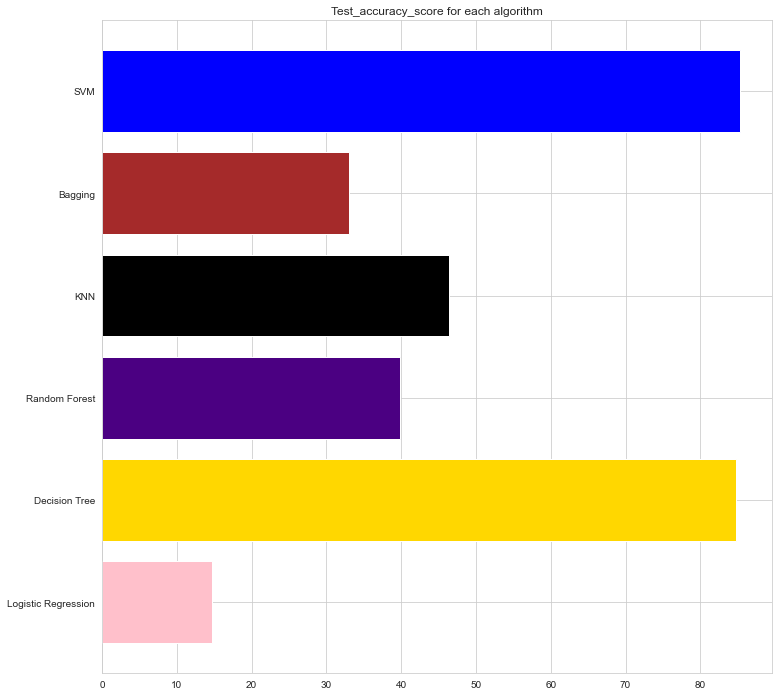

In [1063]:
plt.barh(['Logistic Regression','Decision Tree', 'Random Forest', 'KNN', 'Bagging', 'SVM'], 
        [lr_test_accuracy*100,dt_test_accuracy*100,rf_test_accuracy*100,knn_test_accuracy*100,
                        bc_test_accuracy*100,svc_test_accuracy*100], color=['pink','gold','indigo','black','brown','blue'])
plt.title('Test_accuracy_score for each algorithm')
plt.show()

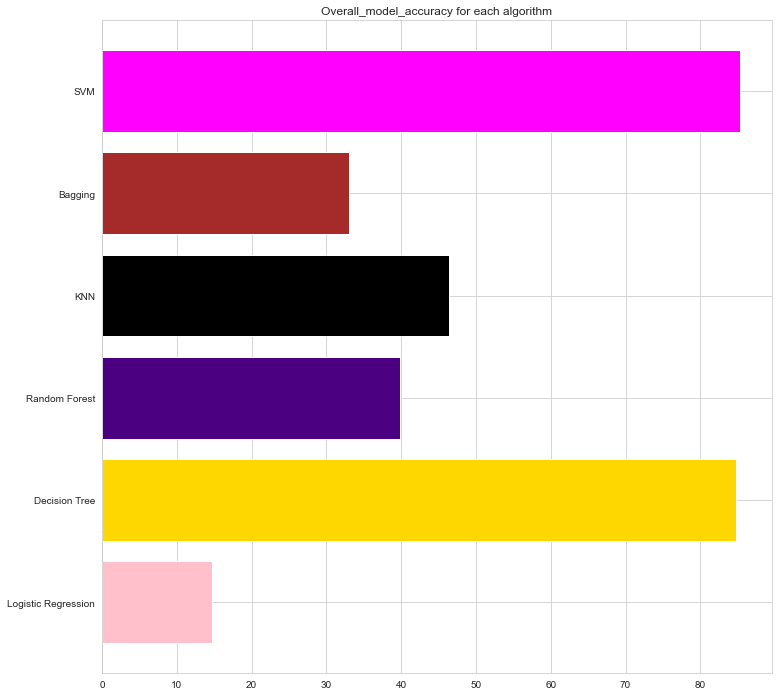

In [1064]:
plt.barh(['Logistic Regression','Decision Tree', 'Random Forest', 'KNN', 'Bagging', 'SVM'], 
        [lr_acc*100,dt_acc*100,rf_acc*100,knn_acc*100,bc_acc*100,svc_acc*100], color=['pink','gold','indigo','black','brown','magenta'])
plt.title('Overall_model_accuracy for each algorithm')
plt.show()

Clearly, the Decision tree and Support vector machine algorithms provided higher accuracy scores to our model
---